In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# reading the dataset
cars = pd.read_excel("cars_train.xlsx")
test_cars = pd.read_excel("cars_test.xlsx")


In [24]:
cars.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
1,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,8189.0
2,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
3,3,194.0,nissan,gas,std,NaN,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
4,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0


In [25]:
test_cars.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,NaN
1,2,164.0,audi,gas,std,four,sedan,4wd,NaN,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,NaN
2,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,NaN
3,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,NaN
4,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,NaN


In [26]:
cars['symboling'].astype('category').value_counts()

0     57
1     36
3     27
2     25
-1    14
-2     3
Name: symboling, dtype: int64

In [27]:
cars['drive.wheels'].astype('category').value_counts()

fwd    91
rwd    64
4wd     7
Name: drive.wheels, dtype: int64

C:\Users\shabe\AppData\Local\Temp\ipykernel_25496\900028547.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['wheel.base'])


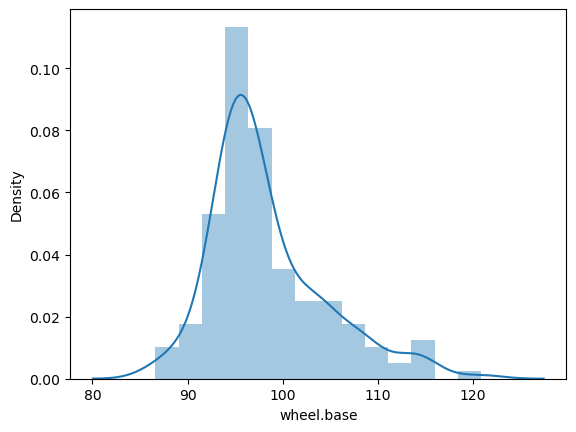

In [28]:
sns.distplot(cars['wheel.base'])
plt.show()

C:\Users\shabe\AppData\Local\Temp\ipykernel_25496\4120422766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['engine.size'])


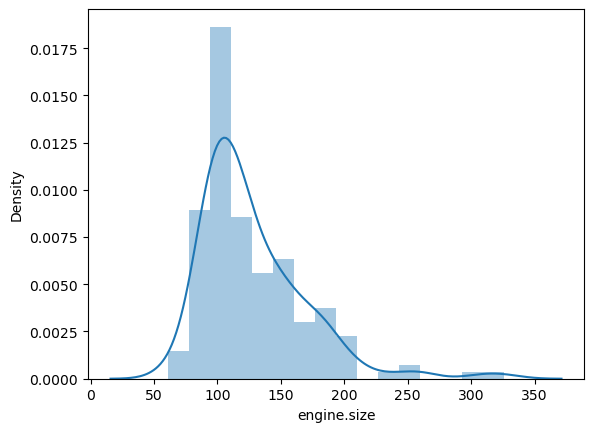

In [29]:
sns.distplot(cars['engine.size'])
plt.show()

C:\Users\shabe\AppData\Local\Temp\ipykernel_25496\796125348.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['Car_Price'])


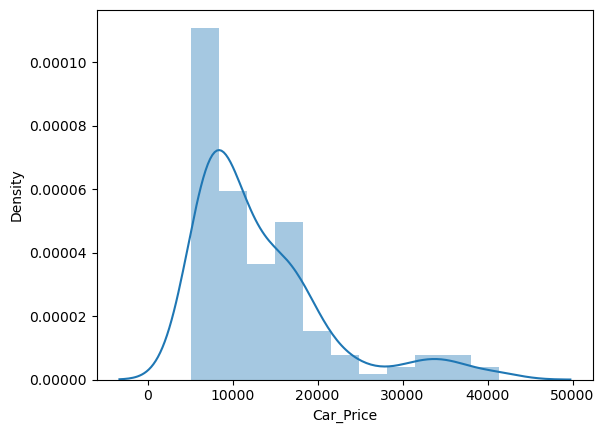

In [30]:
sns.distplot(cars['Car_Price'])
plt.show()

# Data exploration

In [31]:
cars_numeric = cars.select_dtypes(include=['float64', 'int'])
cars_numeric.head()

,symboling,normalized.losses,wheel.base,length,width,height,curb.weight,engine.size,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,1,129.0,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
1,1,125.0,96.3,172.4,65.4,51.6,2405,122,3.35,3.46,8.5,88.0,5000.0,25,32,8189.0
2,3,150.0,95.3,169.0,65.7,49.6,2385,70,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
3,3,194.0,91.3,170.7,67.9,49.7,3071,181,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
4,0,85.0,96.5,175.4,65.2,54.1,2465,110,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0


In [32]:
# dropping symboling and car_ID 
cars_numeric = cars_numeric.drop(['symboling'], axis=1)
cars_numeric.head()

,normalized.losses,wheel.base,length,width,height,curb.weight,engine.size,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,129.0,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
1,125.0,96.3,172.4,65.4,51.6,2405,122,3.35,3.46,8.5,88.0,5000.0,25,32,8189.0
2,150.0,95.3,169.0,65.7,49.6,2385,70,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
3,194.0,91.3,170.7,67.9,49.7,3071,181,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
4,85.0,96.5,175.4,65.2,54.1,2465,110,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0


<Figure size 2000x1000 with 0 Axes>

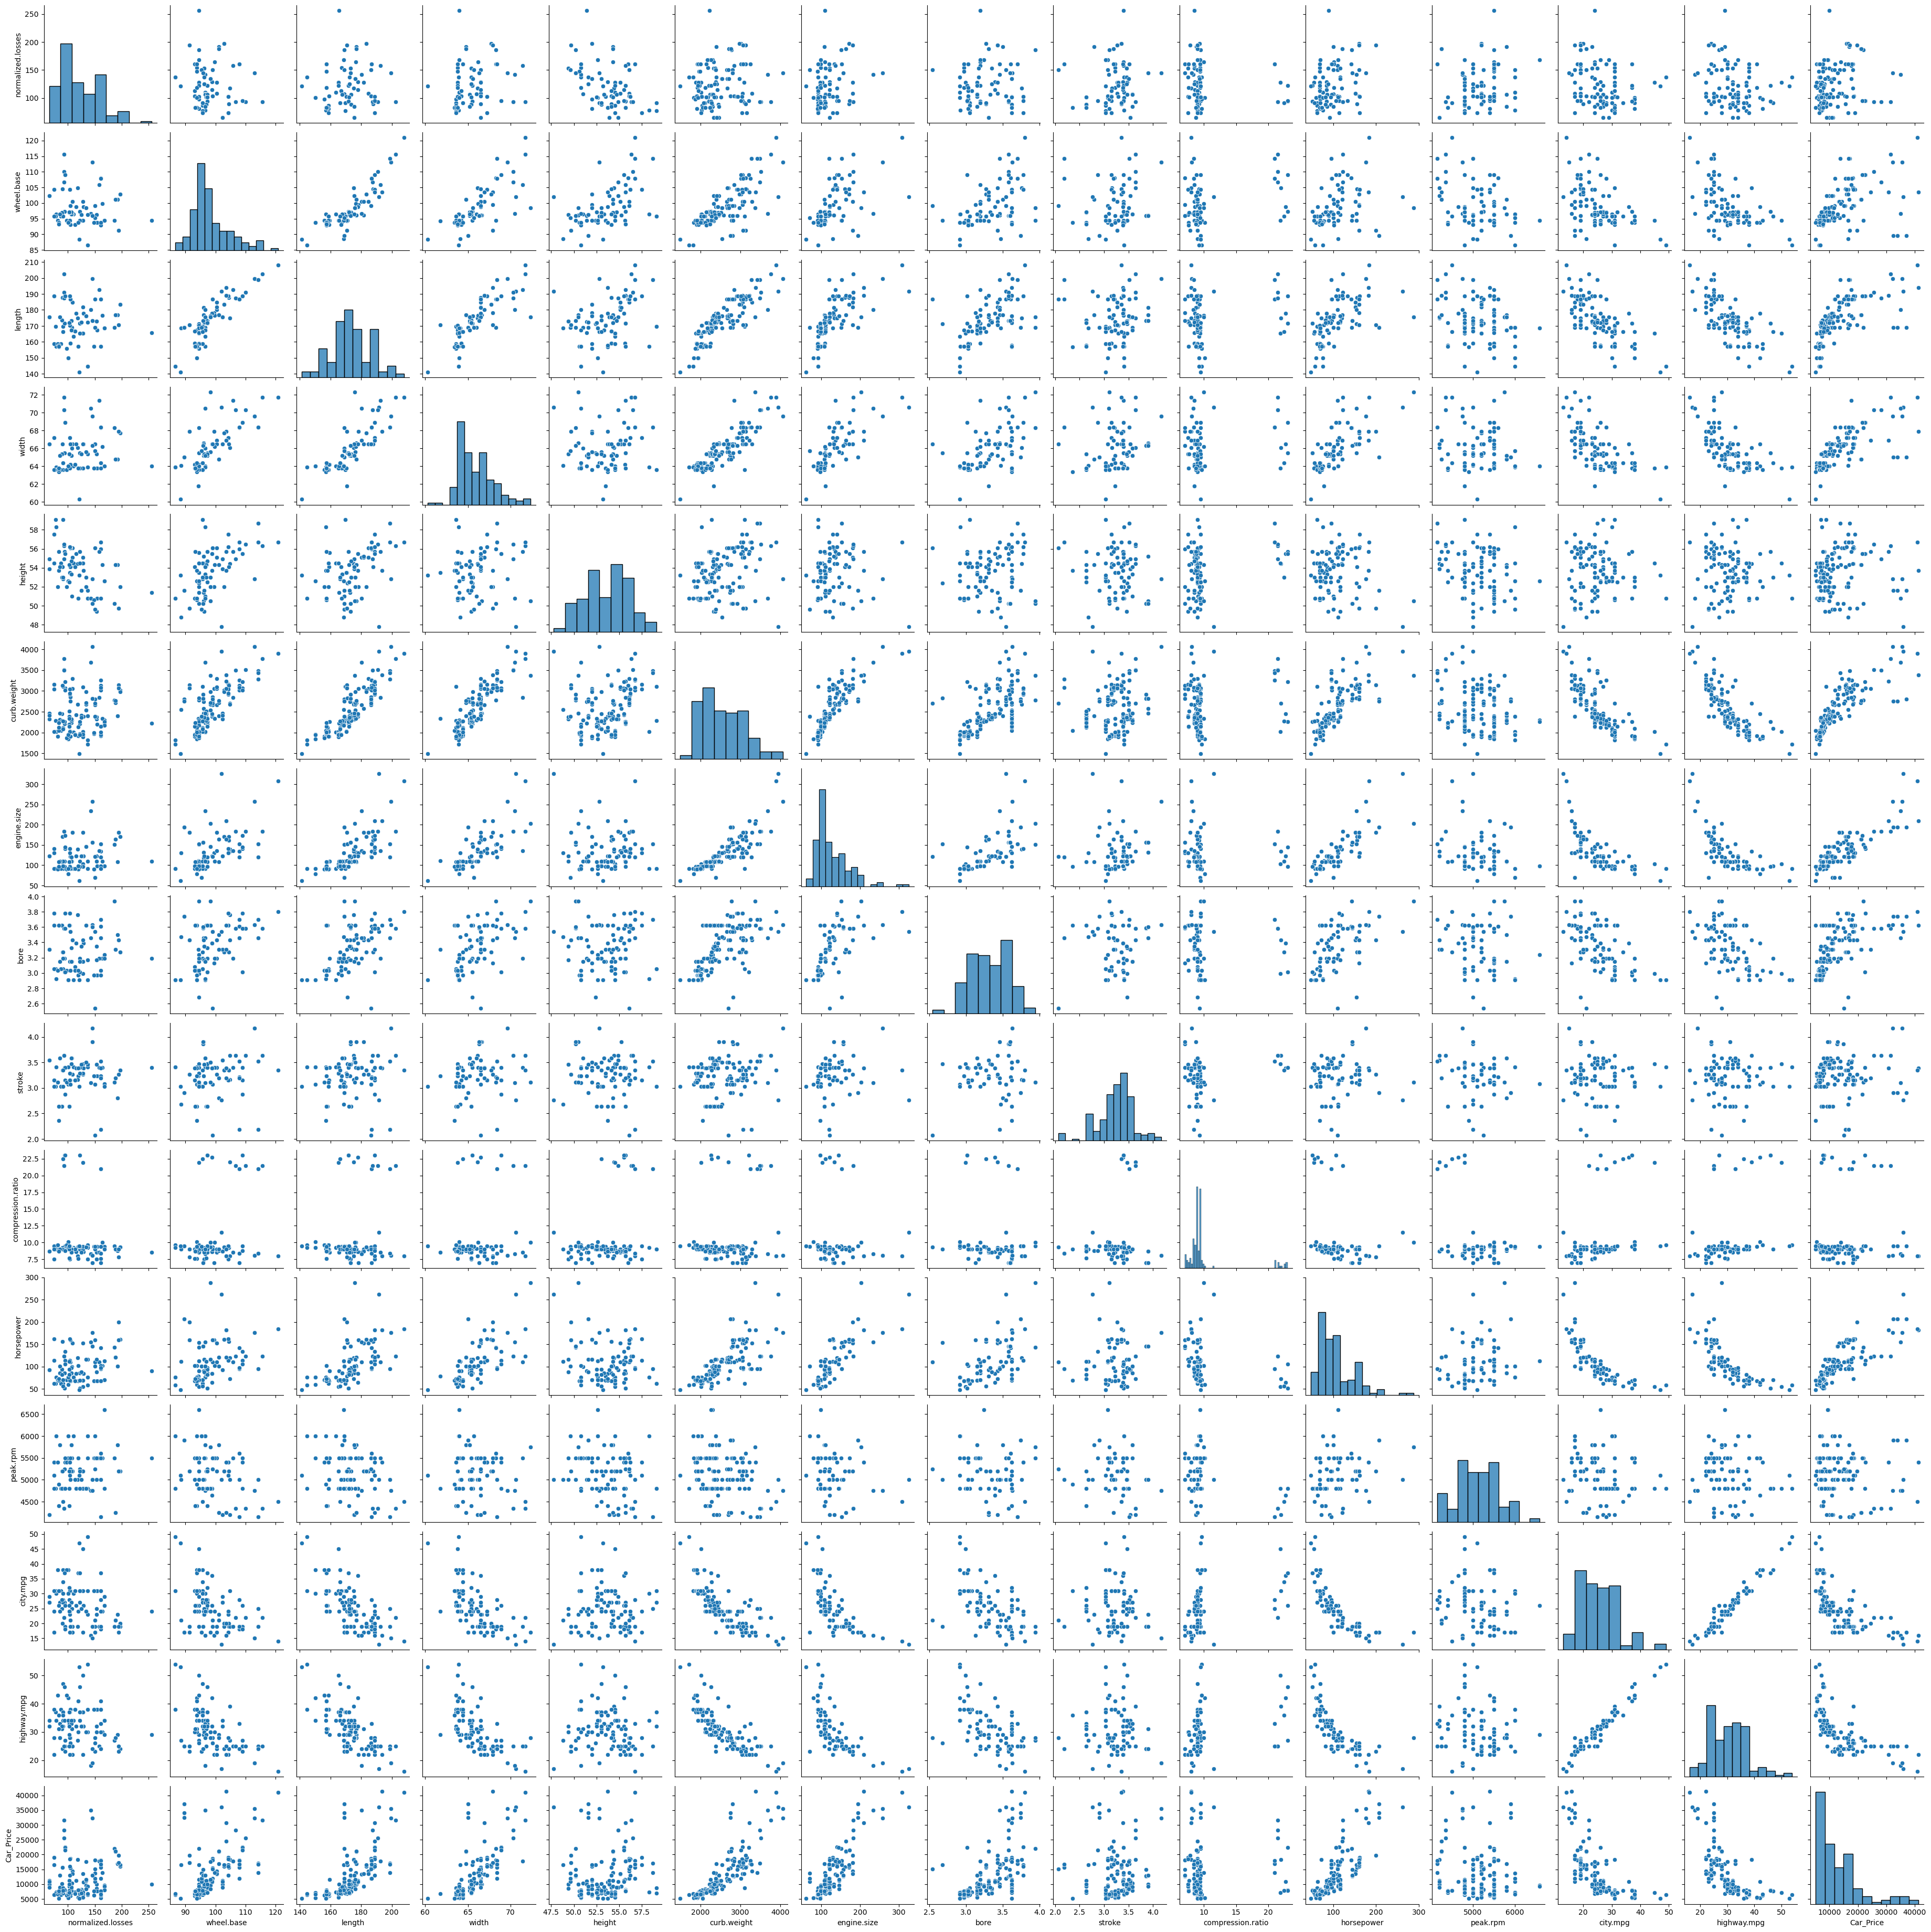

In [33]:
plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()

In [34]:
# correlation matrix
cor = cars_numeric.corr()
cor

,normalized.losses,wheel.base,length,width,height,curb.weight,engine.size,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
normalized.losses,1.000000,-0.076057,0.063181,0.159044,-0.435061,0.181401,0.228772,-0.004921,0.095024,-0.096274,0.352833,0.230618,-0.285347,-0.239027,0.224778
wheel.base,-0.076057,1.000000,0.863965,0.745606,0.556391,0.729194,0.490241,0.425653,0.105860,0.295181,0.265844,-0.365246,-0.425518,-0.502093,0.521079
length,0.063181,0.863965,1.000000,0.817113,0.429977,0.859048,0.648158,0.551534,0.110306,0.192339,0.520132,-0.268613,-0.654932,-0.691100,0.662279
width,0.159044,0.745606,0.817113,1.000000,0.173063,0.867815,0.730638,0.539586,0.172010,0.220524,0.637722,-0.197290,-0.644993,-0.670332,0.720005
height,-0.435061,0.556391,0.429977,0.173063,1.000000,0.212815,-0.036704,0.108395,-0.145114,0.291657,-0.207572,-0.306569,0.017771,-0.037604,0.072688
curb.weight,0.181401,0.729194,0.859048,0.867815,0.212815,1.000000,0.847509,0.605141,0.157205,0.167121,0.741348,-0.238903,-0.764687,-0.802988,0.824544
engine.size,0.228772,0.490241,0.648158,0.730638,-0.036704,0.847509,1.000000,0.561382,0.221045,0.056988,0.826421,-0.211487,-0.661474,-0.676943,0.859515
bore,-0.004921,0.425653,0.551534,0.539586,0.108395,0.605141,0.561382,1.000000,-0.074024,0.019404,0.529624,-0.281830,-0.571841,-0.573833,0.523318
stroke,0.095024,0.105860,0.110306,0.172010,-0.145114,0.157205,0.221045,-0.074024,1.000000,0.172115,0.124641,-0.013214,-0.052357,-0.062431,0.089922
compression.ratio,-0.096274,0.295181,0.192339,0.220524,0.291657,0.167121,0.056988,0.019404,0.172115,1.000000,-0.182497,-0.376027,0.289882,0.225278,0.108229


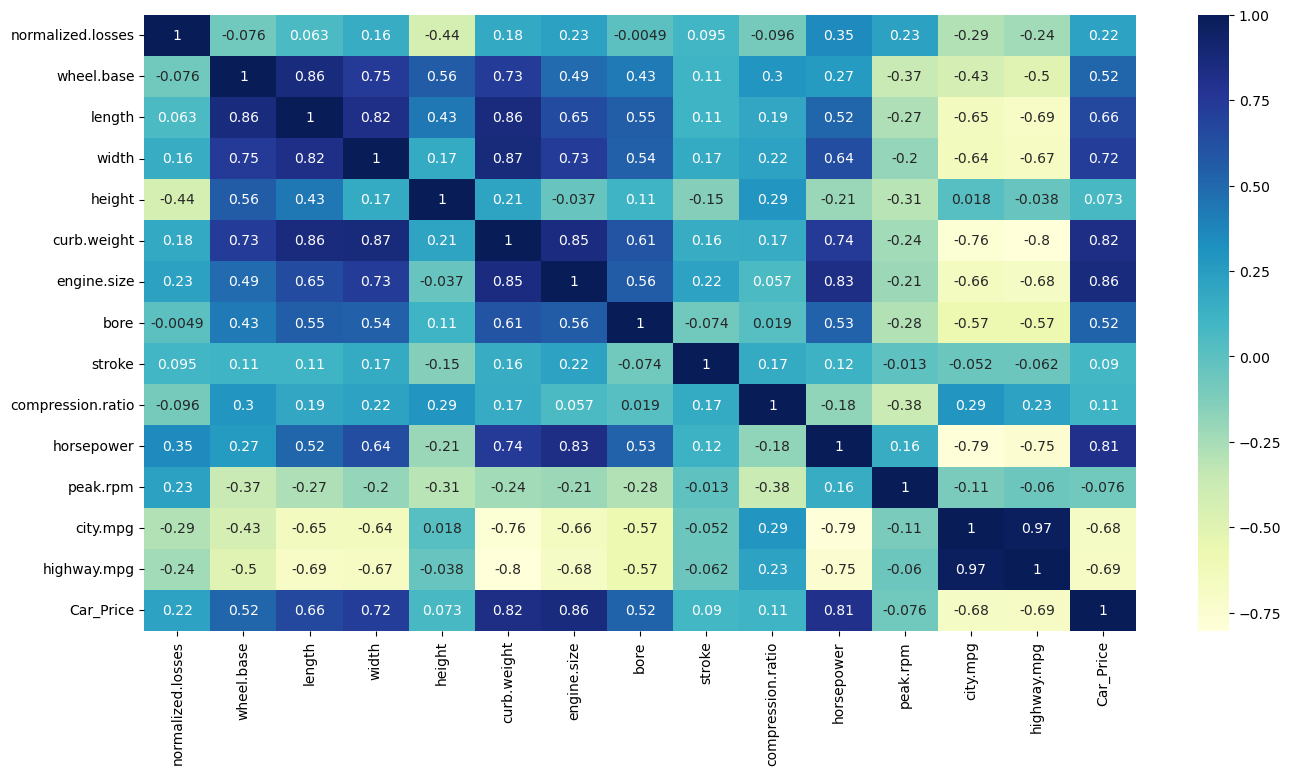

In [35]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


In [36]:
# variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          162 non-null    int64  
 1   normalized.losses  132 non-null    float64
 2   make               162 non-null    object 
 3   fuel.type          162 non-null    object 
 4   aspiration         162 non-null    object 
 5   num.of.doors       151 non-null    object 
 6   body.style         162 non-null    object 
 7   drive.wheels       162 non-null    object 
 8   engine.location    160 non-null    object 
 9   wheel.base         162 non-null    float64
 10  length             162 non-null    float64
 11  width              162 non-null    float64
 12  height             162 non-null    float64
 13  curb.weight        162 non-null    int64  
 14  engine.type        162 non-null    object 
 15  num.of.cylinders   160 non-null    object 
 16  engine.size        162 non

In [37]:
# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          162 non-null    object 
 1   normalized.losses  132 non-null    float64
 2   make               162 non-null    object 
 3   fuel.type          162 non-null    object 
 4   aspiration         162 non-null    object 
 5   num.of.doors       151 non-null    object 
 6   body.style         162 non-null    object 
 7   drive.wheels       162 non-null    object 
 8   engine.location    160 non-null    object 
 9   wheel.base         162 non-null    float64
 10  length             162 non-null    float64
 11  width              162 non-null    float64
 12  height             162 non-null    float64
 13  curb.weight        162 non-null    int64  
 14  engine.type        162 non-null    object 
 15  num.of.cylinders   160 non-null    object 
 16  engine.size        162 non

datya cleaning

In [39]:
# CarName: first few entries
cars['make'][:30]

0             mazda
1        mitsubishi
2             mazda
3            nissan
4             honda
5            subaru
6           renault
7           porsche
8              saab
9             mazda
10             audi
11            isuzu
12       volkswagen
13            mazda
14       volkswagen
15            honda
16           toyota
17           toyota
18       volkswagen
19       mitsubishi
20            honda
21           peugot
22            honda
23            honda
24           nissan
25           toyota
26           nissan
27            honda
28              bmw
29    mercedes-benz
Name: make, dtype: object

In [41]:
# Extracting carname

# Method 1: str.split() by space
carnames = cars['make'].apply(lambda x: x.split(" ")[0])
carnames[:30]

0             mazda
1        mitsubishi
2             mazda
3            nissan
4             honda
5            subaru
6           renault
7           porsche
8              saab
9             mazda
10             audi
11            isuzu
12       volkswagen
13            mazda
14       volkswagen
15            honda
16           toyota
17           toyota
18       volkswagen
19       mitsubishi
20            honda
21           peugot
22            honda
23            honda
24           nissan
25           toyota
26           nissan
27            honda
28              bmw
29    mercedes-benz
Name: make, dtype: object

In [44]:
 #Method 2: Use regular expressions
import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')
carnames = cars['make'].apply(lambda x: re.findall(p, x)[0])
print(carnames)

0           mazda
1      mitsubishi
2           mazda
3          nissan
4           honda
          ...    
157        peugot
158         dodge
159        nissan
160         honda
161        subaru
Name: make, Length: 162, dtype: object


In [47]:
# New column car_company
cars['car_company'] = cars['make'].apply(lambda x: re.findall(p, x)[0])

In [48]:
# look at all values 
cars['car_company'].astype('category').value_counts()

toyota           26
nissan           16
honda            14
subaru           13
mazda            12
mitsubishi       11
peugot           10
volvo             8
volkswagen        7
bmw               6
mercedes-benz     5
porsche           5
saab              5
dodge             4
plymouth          4
jaguar            3
audi              3
isuzu             3
chevrolet         3
renault           2
alfa-romero       2
Name: car_company, dtype: int64

In [49]:
# replacing misspelled car_company names

# volkswagen
cars.loc[(cars['car_company'] == "vw") | 
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

In [50]:
cars['car_company'].astype('category').value_counts()

toyota           26
nissan           16
honda            14
subaru           13
mazda            12
mitsubishi       11
peugot           10
volvo             8
volkswagen        7
bmw               6
mercedes-benz     5
porsche           5
saab              5
dodge             4
plymouth          4
jaguar            3
audi              3
isuzu             3
chevrolet         3
renault           2
alfa-romero       2
Name: car_company, dtype: int64

In [51]:
# outliers
cars.describe()

,normalized.losses,wheel.base,length,width,height,curb.weight,engine.size,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
count,132.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,159.000000,159.000000,162.000000,158.000000,158.000000,162.000000,162.000000,159.000000
mean,123.060606,98.354321,173.595062,65.843210,53.537654,2561.932099,128.160494,3.341698,3.239434,10.008704,106.000000,5116.455696,25.123457,30.679012,13182.094340
std,36.144696,6.049384,12.339100,2.022325,2.346770,524.474870,41.684844,0.274566,0.356446,3.735804,41.489773,501.952971,6.604878,6.879309,7746.121309
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.000000,94.500000,166.425000,64.125000,52.000000,2151.000000,98.000000,3.150000,3.075000,8.700000,72.250000,4800.000000,19.000000,25.000000,7603.000000
50%,116.500000,96.500000,172.400000,65.450000,53.700000,2419.500000,120.000000,3.330000,3.270000,9.000000,95.000000,5100.000000,24.000000,30.000000,10795.000000
75%,150.000000,101.200000,181.650000,66.575000,55.500000,2975.750000,146.000000,3.605000,3.460000,9.400000,121.000000,5500.000000,30.000000,34.000000,16594.000000
max,256.000000,120.900000,208.100000,72.300000,59.100000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,41315.000000


In [ ]:
# split into X and y
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]

y = cars['price']
